# Bar Plot

## # **Categorical Data Visualizations**

* Bar Chart
* Grouped Bar Chart
* Stacked Bar Chart
* 100% Stacked Bar Chart

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Optional: Better styling
plt.style.use('ggplot')

## Sample Dataset

We'll create a dataset of sales from 3 product categories across 4 regions.

In [9]:
data = {
    'Region': ['North', 'South', 'East', 'West'],
    'Electronics': [120, 80, 100, 90],
    'Furniture': [60, 70, 50, 65],
    'Grocery': [200, 220, 180, 210]
}

df = pd.DataFrame(data)
df


,Region,Electronics,Furniture,Grocery
0,North,120,60,200
1,South,80,70,220
2,East,100,50,180
3,West,90,65,210


## Basic Bar Chart

Compare a single categorical variable — Grocery sales by region.

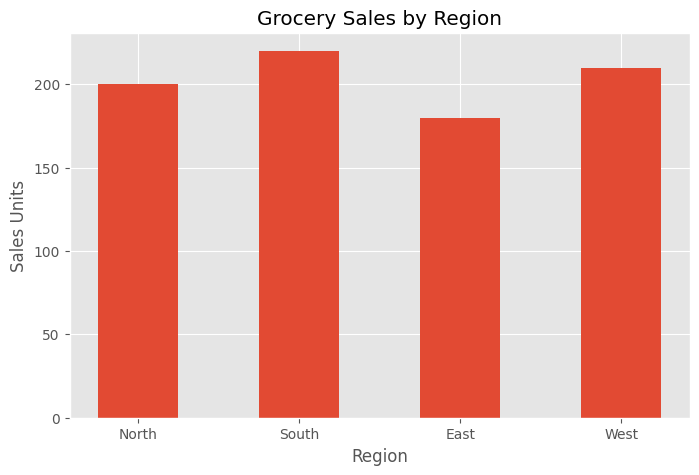

In [10]:
plt.figure(figsize=(8,5))
plt.bar(df['Region'], df['Grocery'], width=0.5)

plt.title("Grocery Sales by Region")
plt.xlabel("Region")
plt.ylabel("Sales Units")
plt.show()


### Variations

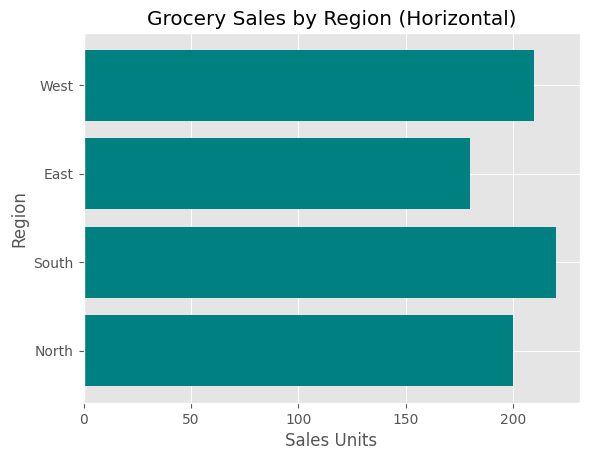

In [11]:
# Horizontal bar chart
plt.barh(df['Region'], df['Grocery'], color='teal')
plt.title("Grocery Sales by Region (Horizontal)")
plt.xlabel("Sales Units")
plt.ylabel("Region")
plt.show()



## Grouped Bar Chart

Compare multiple categories side-by-side.

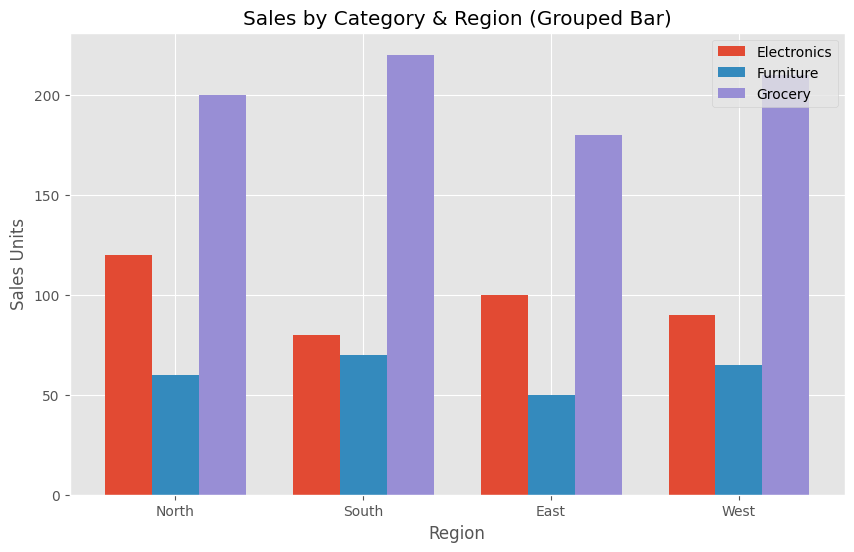

In [12]:
# Create x-axis indices
x = np.arange(len(df['Region']))
width = 0.25

plt.figure(figsize=(10,6))

plt.bar(x - width, df['Electronics'], width=width, label="Electronics")
plt.bar(x, df['Furniture'], width=width, label="Furniture")
plt.bar(x + width, df['Grocery'], width=width, label="Grocery")

plt.xticks(x, df['Region'])
plt.title("Sales by Category & Region (Grouped Bar)")
plt.xlabel("Region")
plt.ylabel("Sales Units")
plt.legend()
plt.show()


## Stacked Bar Chart

Showing composition inside each bar.

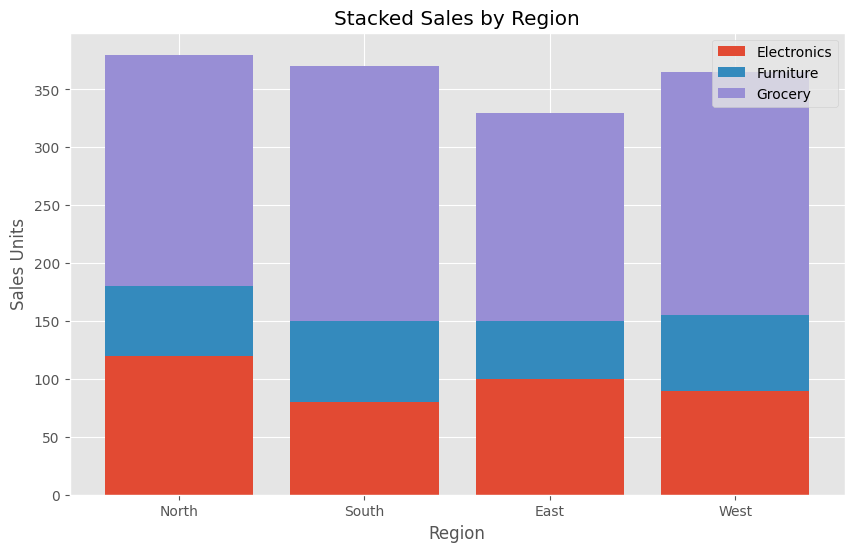

In [13]:
plt.figure(figsize=(10,6))

plt.bar(df['Region'], df['Electronics'], label="Electronics")
plt.bar(df['Region'], df['Furniture'], bottom=df['Electronics'], label="Furniture")
plt.bar(df['Region'],
        df['Grocery'],
        bottom=df['Electronics'] + df['Furniture'],
        label="Grocery")

plt.title("Stacked Sales by Region")
plt.xlabel("Region")
plt.ylabel("Sales Units")
plt.legend()
plt.show()


## 100% Stacked Bar Chart

Percentage contribution of each category.

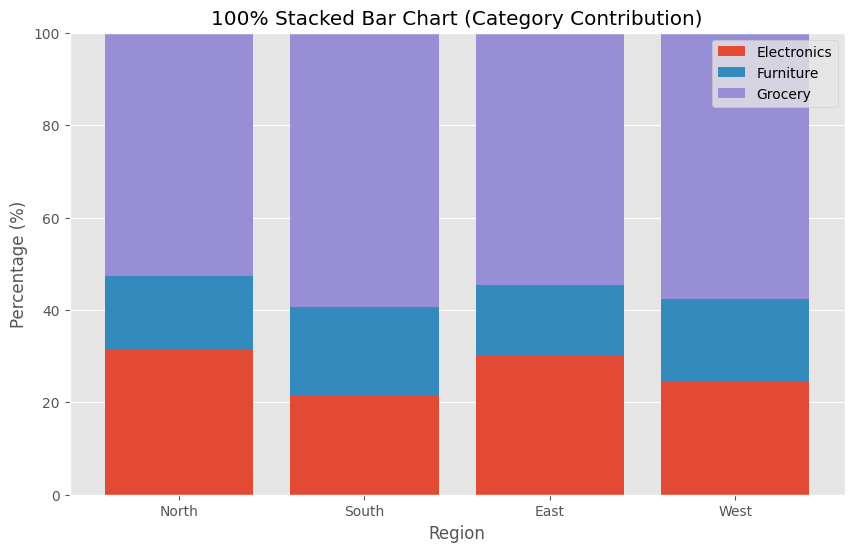

In [14]:
df_percent = df.copy()
total = df[['Electronics', 'Furniture', 'Grocery']].sum(axis=1)

df_percent['Electronics'] = df['Electronics'] / total * 100
df_percent['Furniture'] = df['Furniture'] / total * 100
df_percent['Grocery'] = df['Grocery'] / total * 100

plt.figure(figsize=(10,6))

plt.bar(df['Region'], df_percent['Electronics'], label="Electronics")
plt.bar(df['Region'], df_percent['Furniture'],
        bottom=df_percent['Electronics'], label="Furniture")
plt.bar(df['Region'], df_percent['Grocery'],
        bottom=df_percent['Electronics'] + df_percent['Furniture'], label="Grocery")

plt.title("100% Stacked Bar Chart (Category Contribution)")
plt.xlabel("Region")
plt.ylabel("Percentage (%)")
plt.ylim(0, 100)
plt.legend()
plt.show()


## Styling Upgrades (Optional)

Add annotations for better readability:

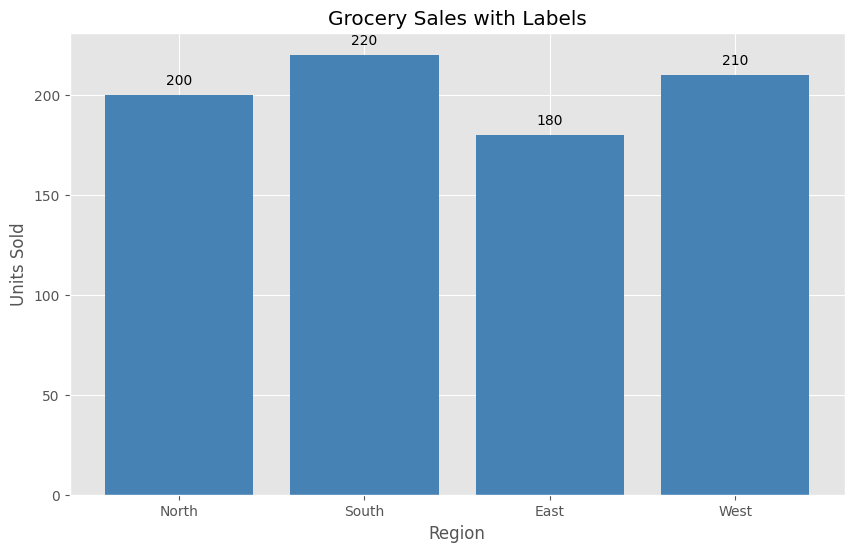

In [15]:
plt.figure(figsize=(10,6))
bars = plt.bar(df['Region'], df['Grocery'], color='steelblue')

# Add values on top
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, yval, ha='center')

plt.title("Grocery Sales with Labels")
plt.xlabel("Region")
plt.ylabel("Units Sold")
plt.show()
